In [2]:
import tensorflow as tf
import numpy as np

In [3]:
if tf.__version__ < "2.0.0":
  !pip install --upgrade tensorflow_gpu==2.0

In [4]:
print(tf.__version__)

2.0.0-alpha0


# STEP 1 : Loading Data
#### The MNIST dataset comes preloaded in Keras, in the form of a set of four Numpy arrays.

#### x_train and x_test parts contain greyscale RGB codes (from 0 to 255) .

#### y_train and y_test parts contains labels from 0 to 9 which represents which number they actually are.

In [5]:
# mnist = tf.keras.datasets.mnist

In [6]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()
import numpy as np

data = np.load("./../../Files/mnist.npz")
x_train = data['x_train']
y_train = data['y_train']
x_test = data['x_test']
y_test = data['y_test']

# STEP 2 : DATA PREPROCESSING
We have to scale x_train and x_test so that all values are in the [0, 1] interval. Why do we need to scale ? goal of scaling is to speed up the algorithm's computation . It is used to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information. It is also required for some algorithms to model the data correctly.

In [7]:
x_train, x_test = x_train / 255.0  ,  x_test / 255.0

# STEP 3 : BUILD NEURAL NETWORK MODEL

In [8]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

# STEP 4 : COMPILATION

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# STEP 5 : TRAIN THE MODEL

In [10]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 8s 140us/sample - loss: 0.2974 - accuracy: 0.9135
Epoch 2/5
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1427 - accuracy: 0.9580
Epoch 3/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1082 - accuracy: 0.9667
Epoch 4/5
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0897 - accuracy: 0.9721
Epoch 5/5
60000/60000 [==============================] - 6s 100us/sample - loss: 0.0767 - accuracy: 0.9759


# STEP 6 : EVALUATE THE TRAINING
#### Now let’s check that the model performs well on the test set, too:

In [11]:
evaluation = model.evaluate(x_test,  y_test, verbose=2)

10000/10000 - 1s - loss: 0.0803 - accuracy: 0.9756


In [12]:
print(evaluation[0])   #test loss
print(evaluation[1])   #test accuracy

0.08026844986225479
0.9756


# STEP 7 (optional) : PREDICTION

In [13]:
import matplotlib.pyplot as plt
plt.imshow(x_test[90],cmap='Greys')
print(model.predict_classes(x_test[90].reshape(1, 28, 28 )))

[3]


In [14]:
y_test[90]

3

In [15]:
x_test[7].shape

(28, 28)

[9]


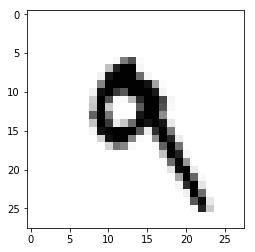

In [17]:
print(model.predict_classes(x_test[7].reshape(1,28,28)))
plt.imshow(x_test[7],cmap="Greys")

In [18]:
y_test[7]

9

# Successful Test 💙

In [19]:
img = plt.imread("./testimage.png")
img.shape

(28, 28)

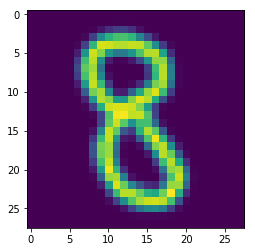

In [20]:
plt.imshow(img) #testing if the image loaded correctly

[8]


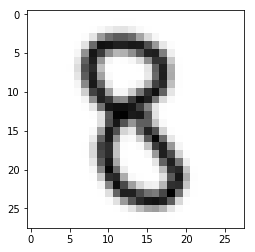

In [21]:
print(model.predict_classes(img.reshape(1,28,28)))
plt.imshow(img, cmap="Greys")

# Unsuccessful Test 🙄

In [22]:
img = plt.imread("./testimage1.png")
img.shape

(28, 28)

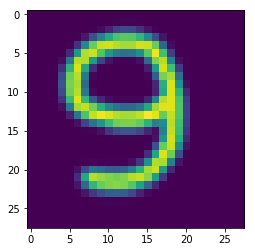

In [23]:
plt.imshow(img) #testing if the image loaded correctly

[3]


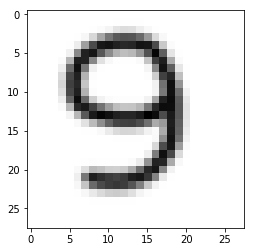

In [24]:
print(model.predict_classes(img.reshape(1,28,28)))
plt.imshow(img, cmap="Greys")